In [6]:
from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

from climate_indices import indices,compute
from climate_indices.indices import Distribution

import PCA_functions as pf

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime, timedelta

from sklearn.cluster import AgglomerativeClustering

import scipy.stats as st
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR

import seaborn as sns

In [22]:
n_components = 5
level = 12
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 

In [23]:
d = Data('GPCC_half.nc','precip',temporal_limits, missing_value=-9.969209968386869e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [24]:
result = pf.deseasonalize(np.array(result))
result = np.array(result)
data = pd.DataFrame(result)

In [25]:
scale = StandardScaler()
scaled_data = scale.fit_transform(data)

pca = PCA(n_components=n_components)
pca_model = pca.fit(data)

pca_data = pca_model.transform(data)

#Matrix = pd.DataFrame(pca_model.components_)
#Matrix1 = np.transpose(Matrix)

Matrix = np.transpose(pca_model.components_)
#Matrix = Matrix/Matrix.sum(axis=0)
#Matrix, R, indx = orthomax(Matrix)

loading = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading = pd.DataFrame(Matrix)
#loading = loading.abs()
#loading = loading/loading.sum()

clusters = loading.idxmax(axis=1)
df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clusters.values.tolist()})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

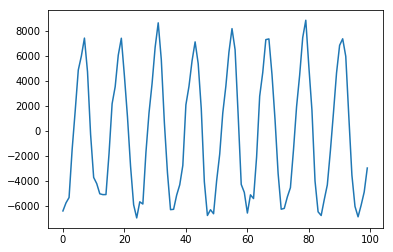

In [28]:
plt.plot(pca_data[0:100,0])

# Plot of weights of each time series

Text(0.5,1,'Principal Component 1')

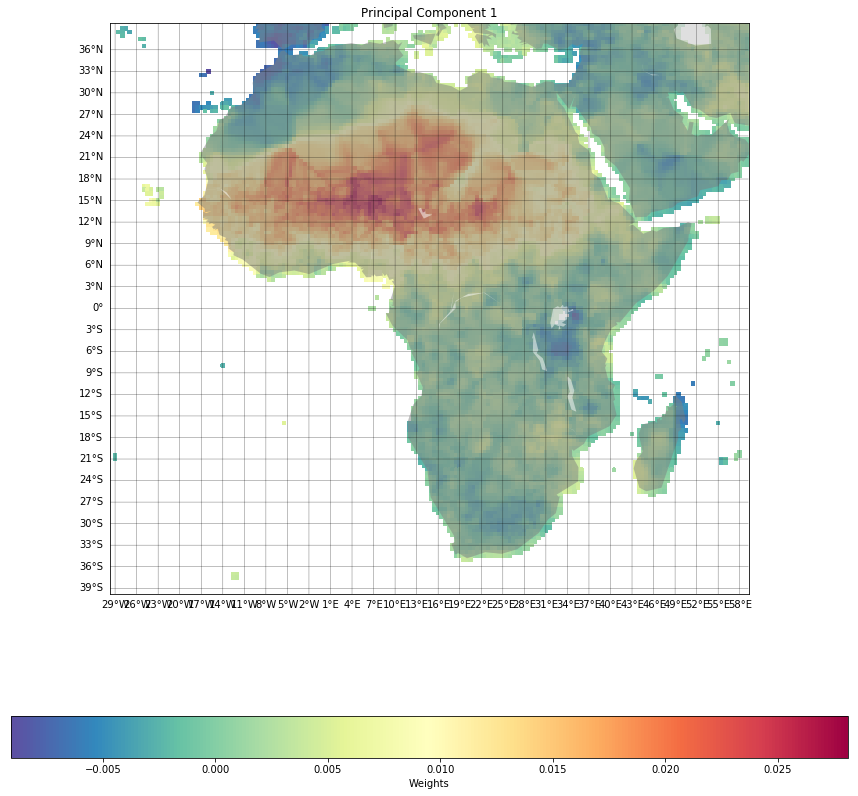

In [26]:
pc = 0
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)

plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

Text(0.5,1,'EOF 2')

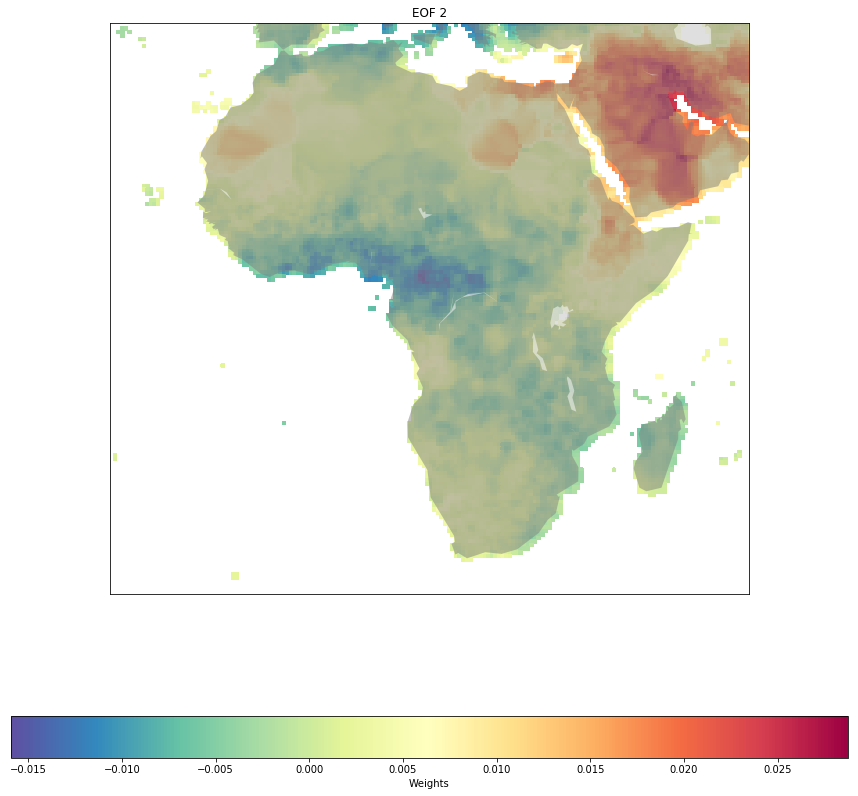

In [27]:
pc = 1
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("EOF %d"%(pc+1))

Text(0.5,1,'Principal Component 3')

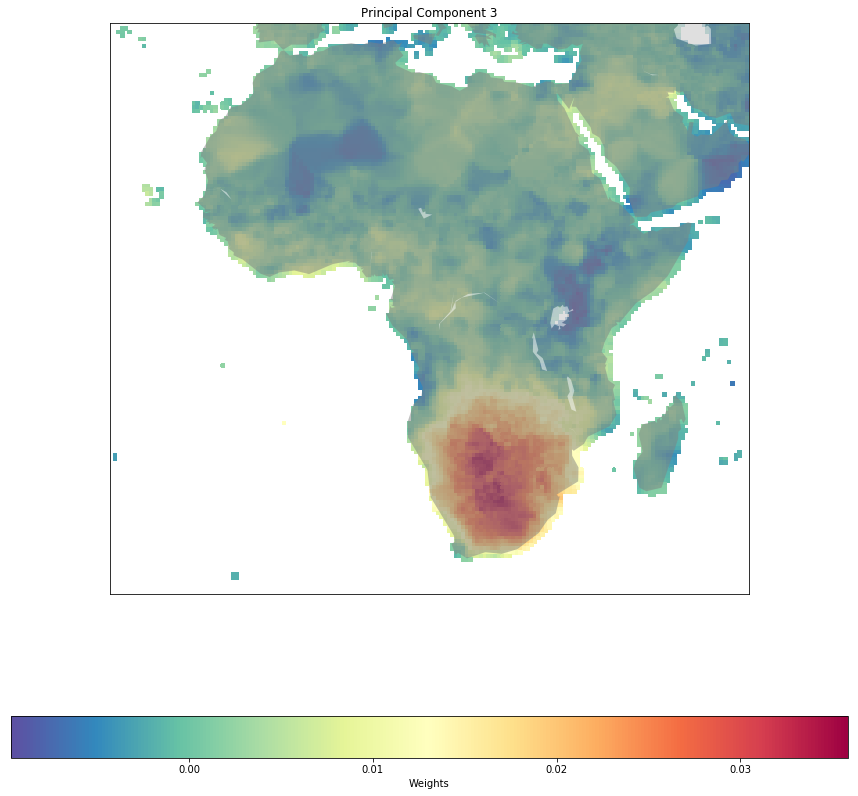

In [28]:
pc = 2
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

Text(0.5,1,'Principal Component 4')

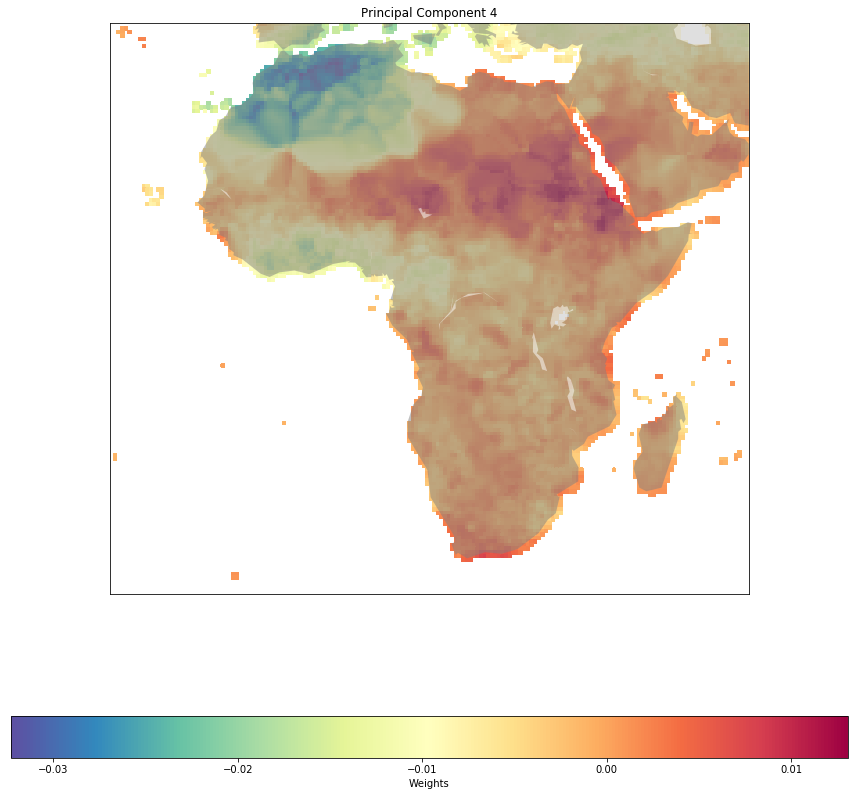

In [29]:
pc = 3
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

Text(0.5,1,'Principal Component 5')

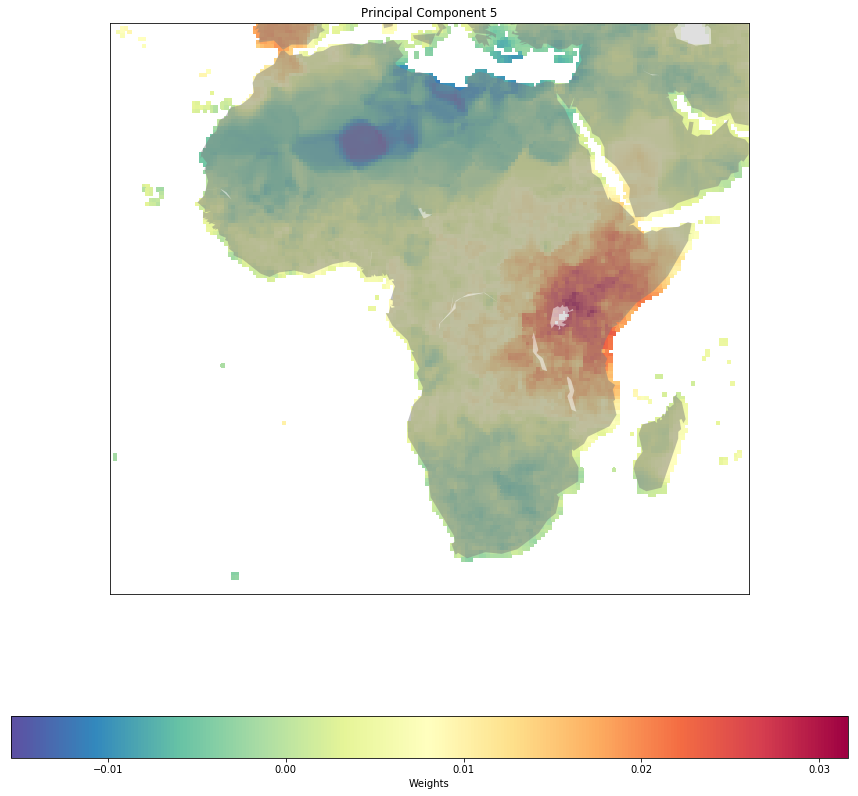

In [30]:
pc = 4
df["pc"] = loading[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,59.75,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

#deg = np.flip(deg, axis=0)

#lon = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
map.drawcoastlines(linewidth=0.)
xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Weights')
plt.title("Principal Component %d"%(pc+1))

# Discovery of Causality links

In [31]:
var_names = loading.columns

#pca_data = pca_model.transform(data)
pca_data = result.dot(loading)
pca_data = np.matrix(pca_data)

dataframe = pp.DataFrame(pca_data,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [32]:
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable 0 has 3 link(s):
        (3 0): pval = 0.00000 | val = -0.311
        (0 -1): pval = 0.00000 | val = 0.262
        (1 0): pval = 0.00000 | val = 0.161

    Variable 1 has 6 link(s):
        (4 0): pval = 0.00000 | val = 0.260
        (3 0): pval = 0.00000 | val = -0.229
        (0 0): pval = 0.00000 | val = 0.161
        (1 -1): pval = 0.00022 | val = 0.130
        (2 0): pval = 0.01812 | val = 0.083
        (2 -1): pval = 0.02694 | val = 0.078

    Variable 2 has 4 link(s):
        (2 -1): pval = 0.00000 | val = 0.235
        (4 -1): pval = 0.00479 | val = -0.099
        (1 0): pval = 0.01812 | val = 0.083
        (3 0): pval = 0.02679 | val = -0.078

    Variable 3 has 5 link(s):
        (0 0): pval = 0.00000 | val = -0.311
        (1 0): pval = 0.00000 | val = -0.229
        (3 -1): pval = 0.00000 | val = 0.221
        (2 0): pval = 0.02679 | val = -0.078
        (2 -1): pval = 0.03066 | val = -0.076

    Variable 4 has 3 link(s):

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4be0b45160>)

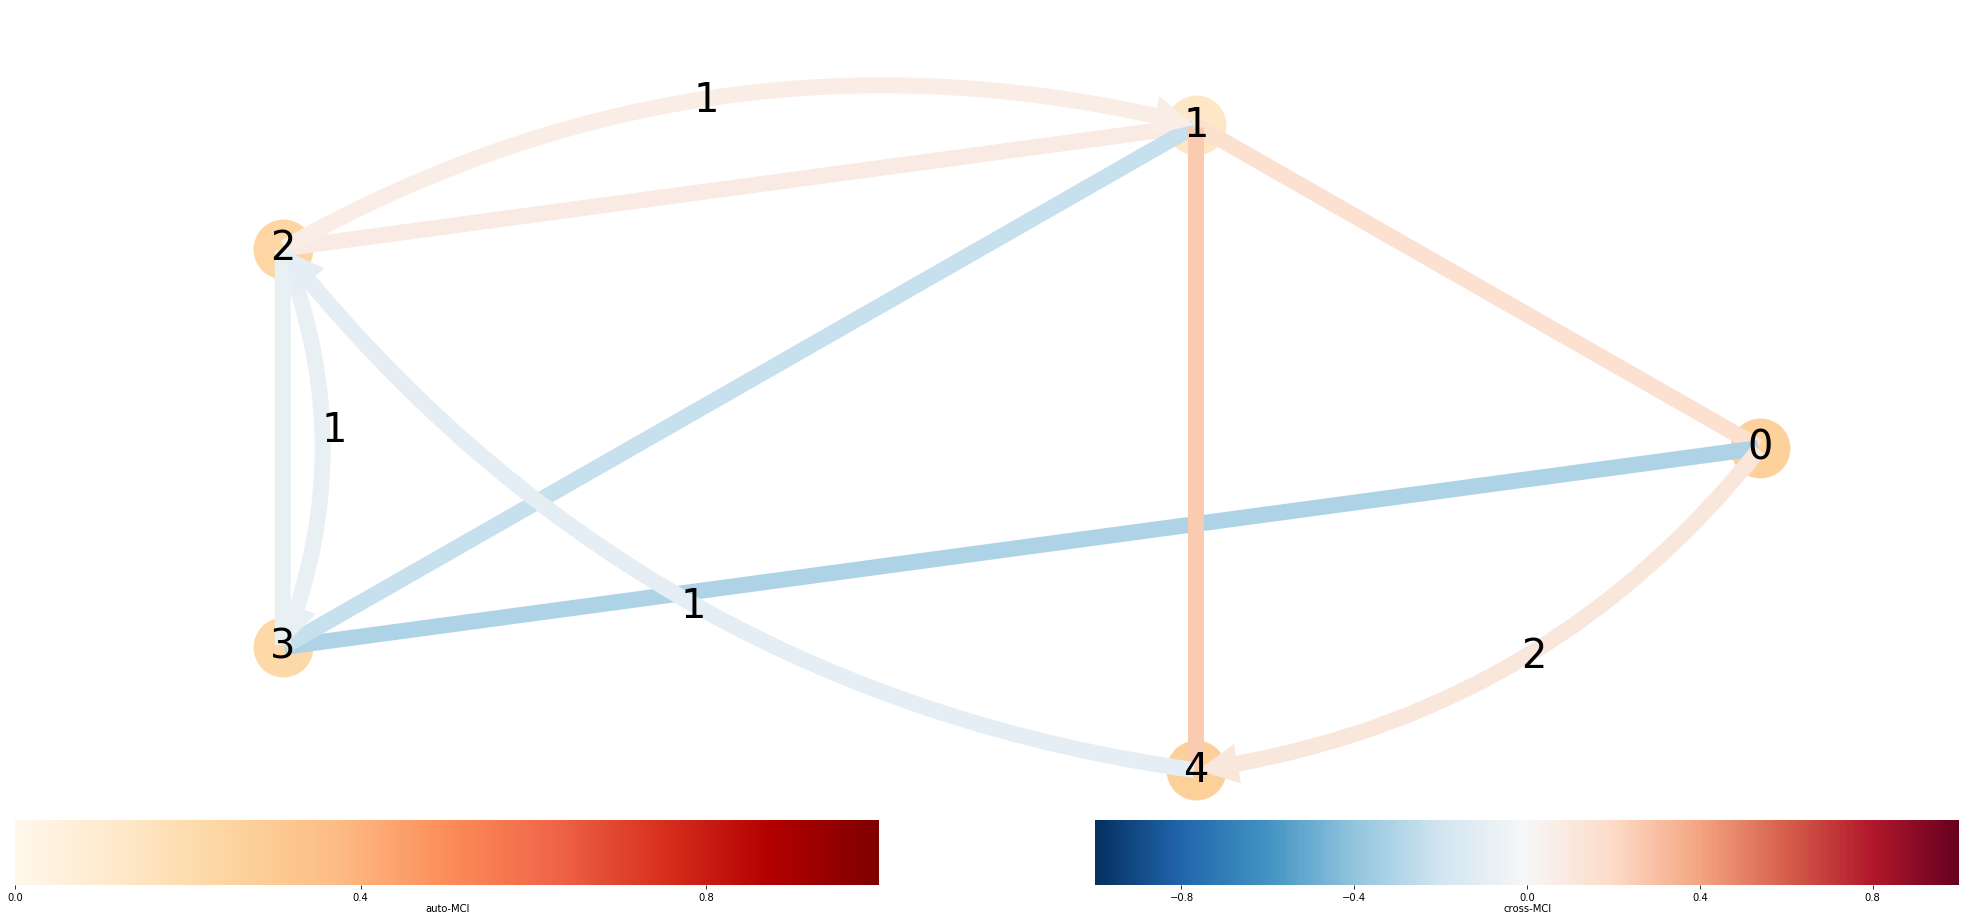

In [33]:
link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.05)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 80
    )

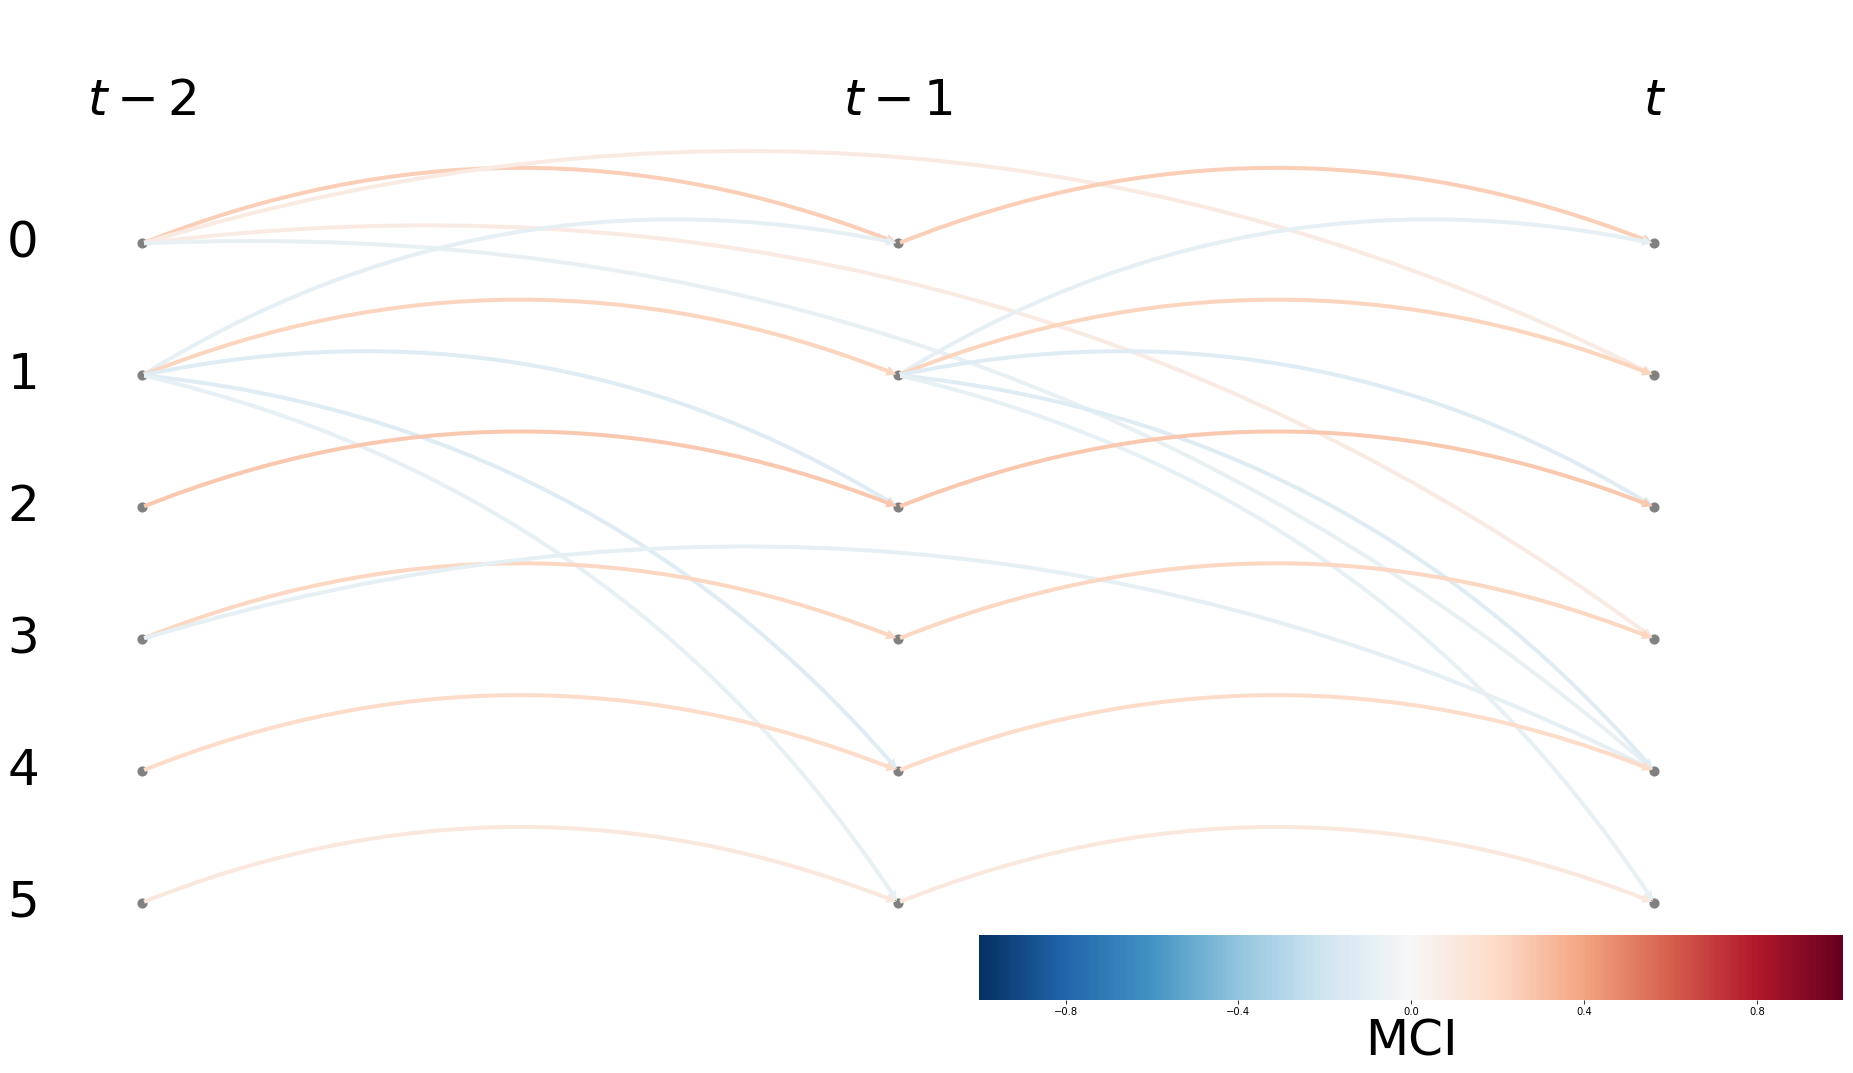

In [42]:
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='MCI',figsize=(30,15),
    node_label_size=100,
    label_fontsize = 50
    )

# Benjamini–Hochberg procedure for False discovery rate

In [37]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable 0 has 3 link(s):
        (3 0): pval = 0.00000 | qval = 0.00000 | val = -0.311
        (0 -1): pval = 0.00000 | qval = 0.00000 | val = 0.262
        (1 0): pval = 0.00000 | qval = 0.00000 | val = 0.161

    Variable 1 has 4 link(s):
        (4 0): pval = 0.00000 | qval = 0.00000 | val = 0.260
        (3 0): pval = 0.00000 | qval = 0.00000 | val = -0.229
        (0 0): pval = 0.00000 | qval = 0.00000 | val = 0.161
        (1 -1): pval = 0.00022 | qval = 0.00223 | val = 0.130

    Variable 2 has 1 link(s):
        (2 -1): pval = 0.00000 | qval = 0.00000 | val = 0.235

    Variable 3 has 3 link(s):
        (0 0): pval = 0.00000 | qval = 0.00000 | val = -0.311
        (1 0): pval = 0.00000 | qval = 0.00000 | val = -0.229
        (3 -1): pval = 0.00000 | qval = 0.00000 | val = 0.221

    Variable 4 has 2 link(s):
        (4 -1): pval = 0.00000 | qval = 0.00000 | val = 0.277
        (1 0): pval = 0.00000 | qval = 0.00000 | val = 0.260


(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4be8e02710>)

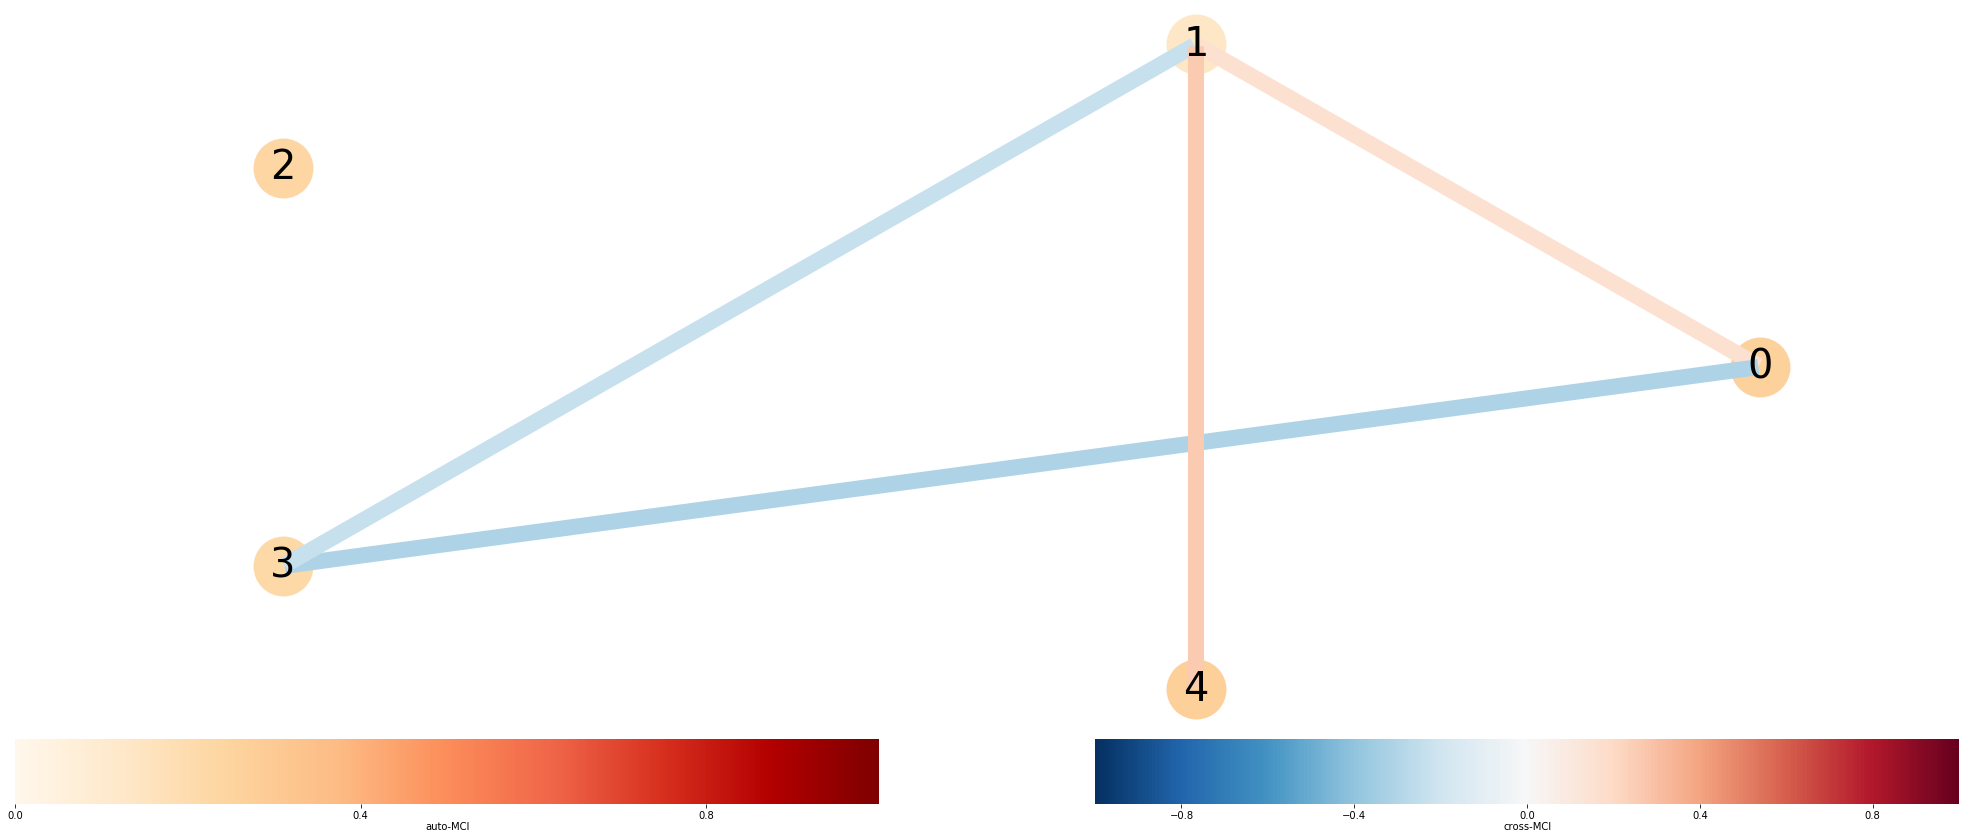

In [38]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 80
    )

# Adding SST

In [39]:
sst = Data('sst.mnmean.nc','sst',temporal_limits, missing_value= -9.96921e+36)

result_sst = sst.get_data()
lon_sst_list = sst.get_lon_list()
lat_sst_list = sst.get_lat_list()
lon_sst = sst.get_lon()
lat_sst = sst.get_lat()

result_sst = pf.deseasonalize(np.array(result_sst))
data_sst = pd.DataFrame(result_sst)

#result_sst = pf.deseasonalize(np.array(result_sst))
n_components_sst = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_sst)

pca = PCA(n_components=n_components_sst)
pca_model = pca.fit(scaled_data)

#pca_data = pca_model.transform(data)

#Matrix = pd.DataFrame(pca_model.components_)
#Matrix1 = np.transpose(Matrix)

Matrix = np.transpose(pca_model.components_)
#Matrix1 = Matrix1/Matrix1.sum(axis=0)
#Matrix = Matrix/Matrix.sum(axis=0)
#Matrix, R, indx = orthomax(Matrix)


loading_sst = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading_sst = pd.DataFrame(Matrix)
#loading = pd.DataFrame(Matrix)
#loading = loading.abs()
#loading = loading/loading.sum()

clusters = loading_sst.idxmax(axis=1)
df_sst = pd.DataFrame({"lons":lon_sst_list,"lats":lat_sst_list,"clusters":clusters.values.tolist()})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

# Adding Air pressure

In [40]:
pres = Data('pres.mon.mean.nc','pres',temporal_limits, missing_value= -9.96921e+36)

result_pres = pres.get_data()
lon_pres_list = pres.get_lon_list()
lat_pres_list = pres.get_lat_list()
lon_pres = pres.get_lon()
lat_pres = pres.get_lat()

result_pres = pf.deseasonalize(np.array(result_pres))
data_pres = pd.DataFrame(result_pres)

#result_pres = pf.deseasonalize(np.array(result_pres))
n_components_pres = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_pres)

pca = PCA(n_components=n_components_pres)
pca_model = pca.fit(scaled_data)

Matrix = np.transpose(pca_model.components_)
#Matrix = Matrix/Matrix.sum(axis=0)


loading_pres = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading_pres = pd.DataFrame(Matrix)

clusters = loading_pres.idxmax(axis=1)
df_pres = pd.DataFrame({"lons":lon_pres_list,"lats":lat_pres_list,"clusters":clusters.values.tolist()})

lon_temp = df_pres["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_pres["lons"].vlues = lon_temp

# Adding Air temperature

In [41]:
air = Data('air.mon.mean.nc','air',temporal_limits, missing_value= -9.96921e+36)

result_air = air.get_data()
lon_air_list = air.get_lon_list()
lat_air_list = air.get_lat_list()
lon_air = air.get_lon()
lat_air = air.get_lat()

result_air = pf.deseasonalize(np.array(result_air))
data_air = pd.DataFrame(result_air)

#result_air = pf.deseasonalize(np.array(result_air))
n_components_air = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_air)

pca = PCA(n_components=n_components_air)
pca_model = pca.fit(scaled_data)

Matrix = np.transpose(pca_model.components_)
#Matrix = Matrix/Matrix.sum(axis=0)


loading_air = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading_air = pd.DataFrame(Matrix)

clusters = loading_air.idxmax(axis=1)
df_air = pd.DataFrame({"lons":lon_air_list,"lats":lat_air_list,"clusters":clusters.values.tolist()})

lon_temp = df_air["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_air["lons"].vlues = lon_temp

# Discovery of Causality links

In [42]:
pres_name  = []
for i in range(n_components_pres):
    pres_name.append("Pres_%d"%i)

air_name  = []
for i in range(n_components_air):
    air_name.append("Air_%d"%i)

sst_name  = []
for i in range(n_components_sst):
    sst_name.append("SST_%d"%i)

precip_name  = []
for i in range(n_components):
    precip_name.append("Precipitation_%d"%i)

var_names = precip_name + sst_name + air_name + pres_name

result_precip = result.dot(loading)
result_sst = result_sst.dot(loading_sst)
result_air = result_air.dot(loading_air)
result_pres = result_pres.dot(loading_pres)

result = np.concatenate((result_precip, result_sst, result_air, result_pres), axis=1)
result = np.matrix(result)

In [43]:
dataframe = pp.DataFrame(result,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [44]:
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)

In [45]:
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.01)


## Significant links at alpha = 0.01:

    Variable Precipitation_0 has 7 link(s):
        (Precipitation_3 0): pval = 0.00000 | val = -0.294
        (Pres_2 0): pval = 0.00000 | val = -0.203
        (Precipitation_0 -1): pval = 0.00000 | val = 0.202
        (Precipitation_1 0): pval = 0.00000 | val = 0.188
        (SST_1 0): pval = 0.00062 | val = -0.122
        (Air_3 0): pval = 0.00810 | val = 0.095
        (SST_0 -1): pval = 0.00998 | val = -0.092

    Variable Precipitation_1 has 12 link(s):
        (Precipitation_4 0): pval = 0.00000 | val = 0.247
        (Precipitation_3 0): pval = 0.00000 | val = -0.238
        (Precipitation_0 0): pval = 0.00000 | val = 0.188
        (Pres_5 0): pval = 0.00008 | val = -0.140
        (Pres_8 -1): pval = 0.00019 | val = 0.133
        (SST_1 0): pval = 0.00024 | val = -0.131
        (Pres_9 0): pval = 0.00038 | val = -0.126
        (Pres_2 -1): pval = 0.00308 | val = -0.105
        (Pres_2 0): pval = 0.00369 | val = -0.103
        (Precipitation

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4a244eacc0>)

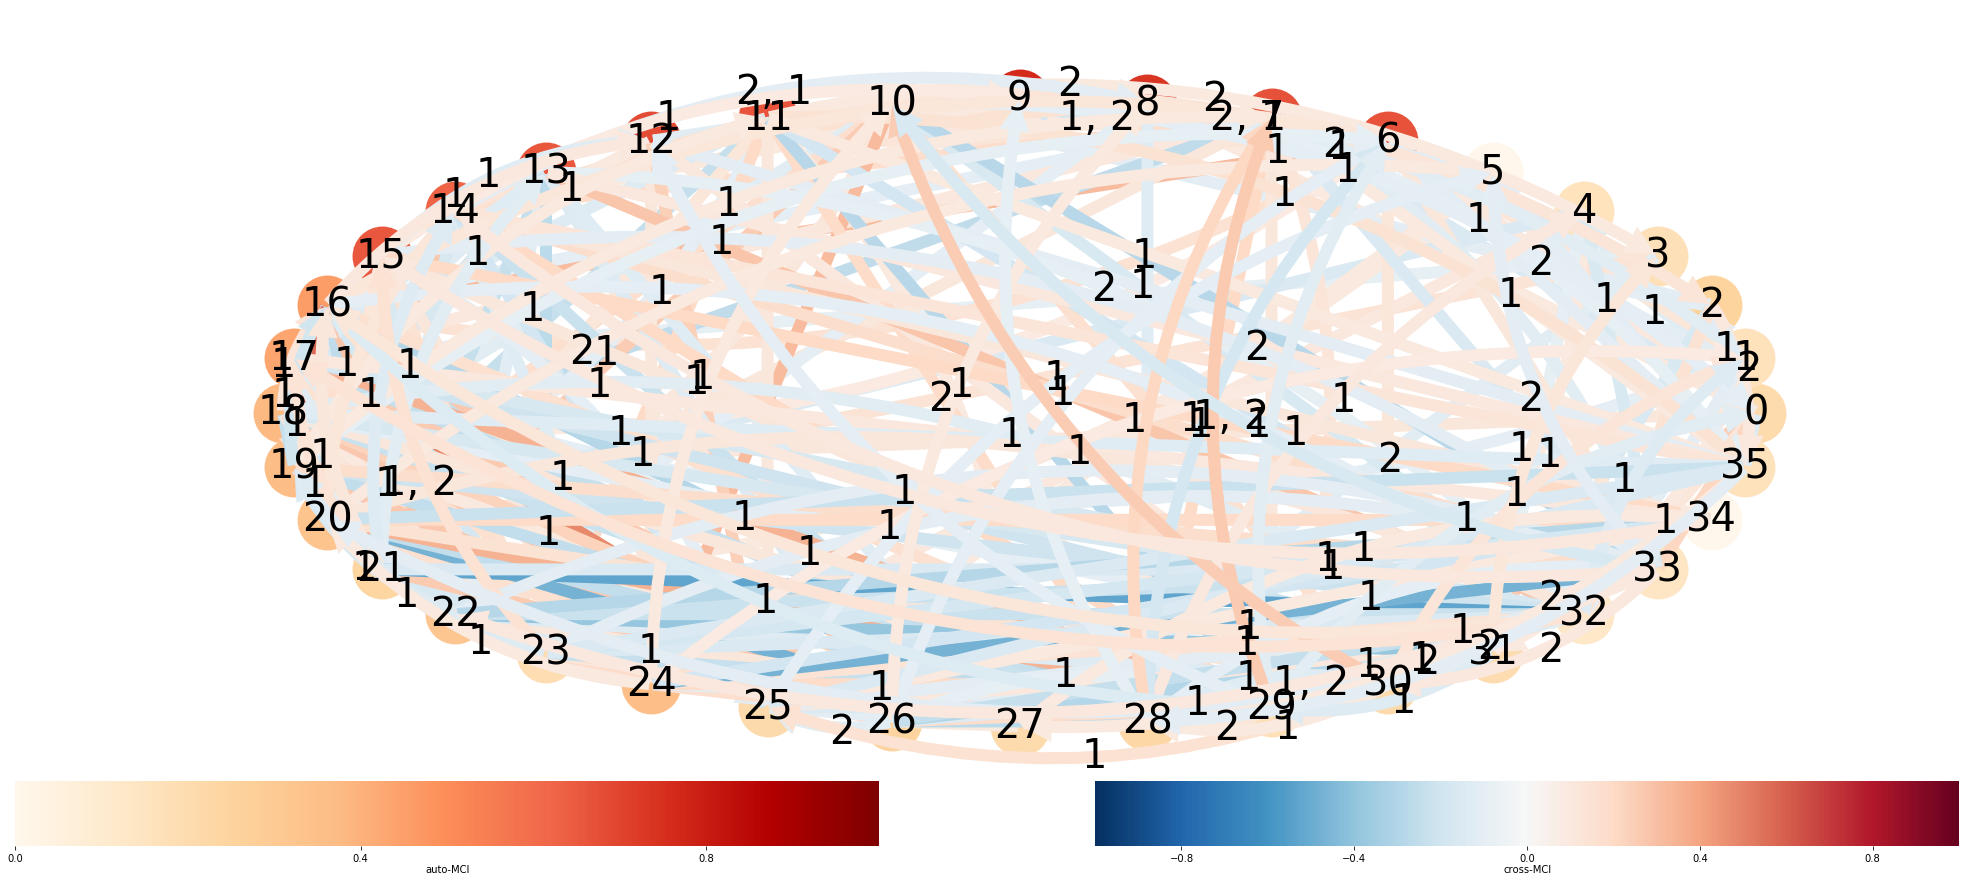

In [58]:
link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 60
    )

In [55]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable Precipitation_0 has 9 link(s):
        (Pres_4 0): pval = 0.00000 | qval = 0.00000 | val = 0.252
        (Pres_7 0): pval = 0.00000 | qval = 0.00000 | val = 0.215
        (Precipitation_0 -1): pval = 0.00000 | qval = 0.00000 | val = 0.203
        (SST_1 0): pval = 0.00003 | qval = 0.00003 | val = -0.149
        (Pres_9 0): pval = 0.00039 | qval = 0.00039 | val = -0.126
        (Pres_6 0): pval = 0.00094 | qval = 0.00094 | val = 0.118
        (Air_3 0): pval = 0.00192 | qval = 0.00192 | val = 0.111
        (SST_0 0): pval = 0.00297 | qval = 0.00297 | val = 0.106
        (SST_2 0): pval = 0.00720 | qval = 0.00720 | val = 0.096

    Variable Precipitation_1 has 3 link(s):
        (Precipitation_1 -1): pval = 0.00000 | qval = 0.00026 | val = 0.164
        (SST_0 0): pval = 0.00073 | qval = 0.00073 | val = 0.121
        (Pres_6 0): pval = 0.00428 | qval = 0.00428 | val = -0.102

    Variable Precipitation_2 has 4 link(s):
        (Precipi

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4a247f8390>)

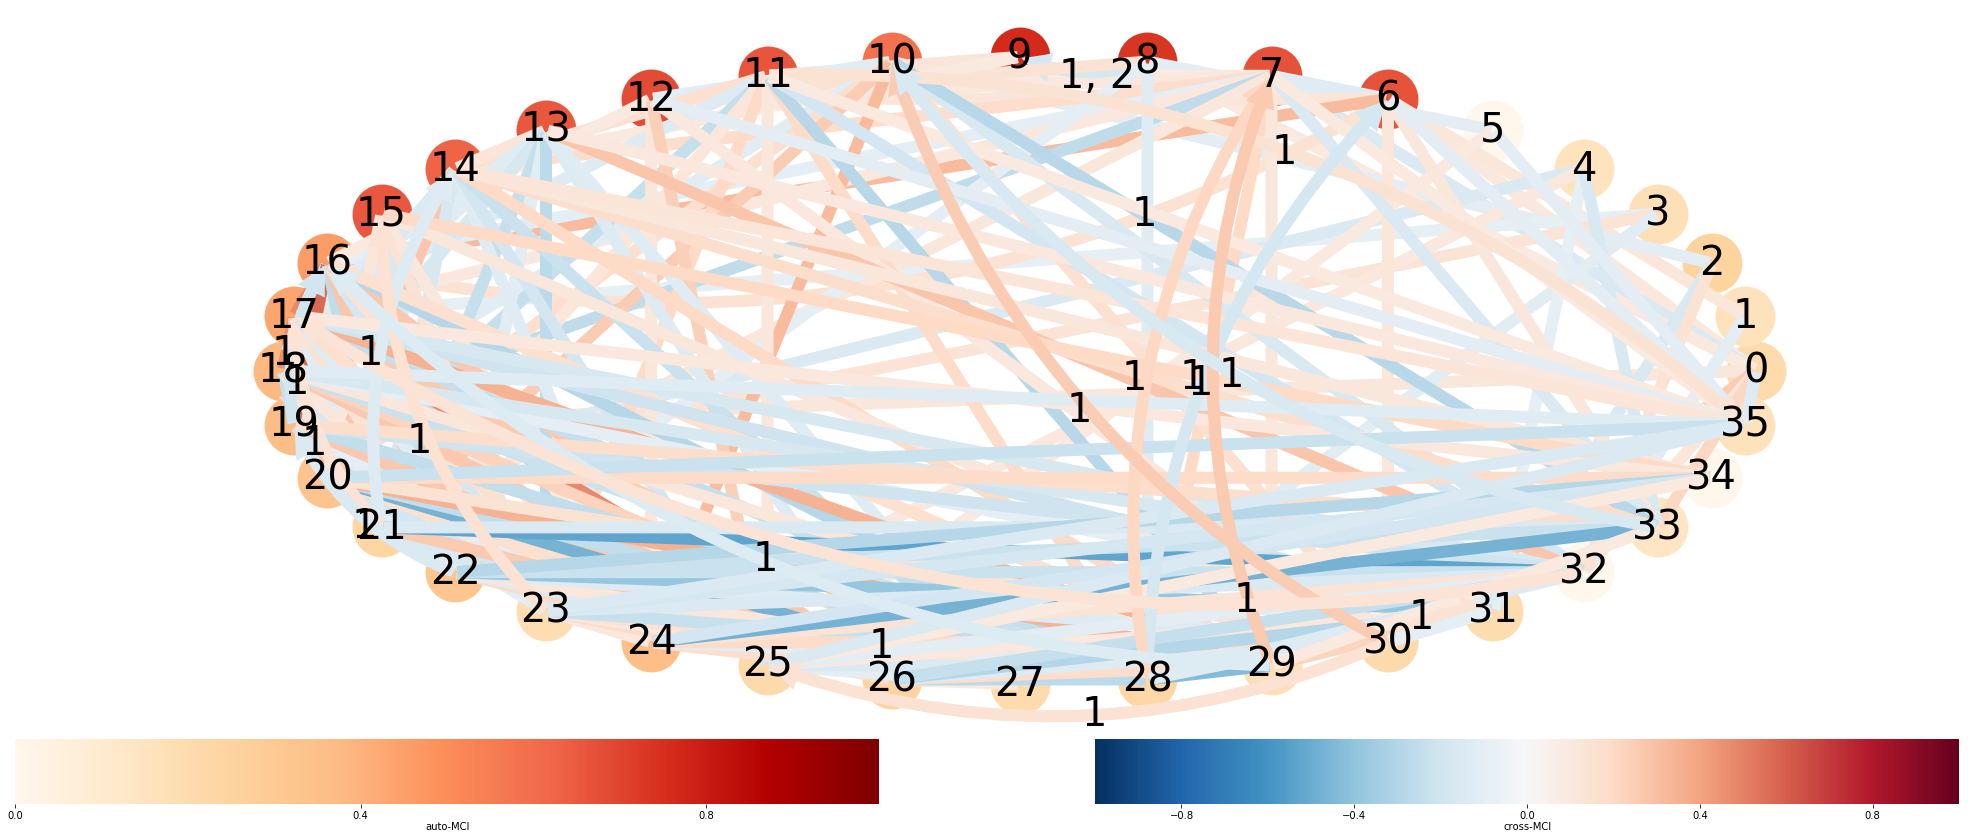

In [56]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 60
    )

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(data)

X_embedded.shape

s = np.sum(data, axis=1)

#base = datetime(2016, 1, 1, 0, 0)
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
r = np.arange(len(s[-400:]))
plt.plot(r,s[-400:])
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))   #to get a tick every 15 minutes
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.xlabel('time', fontsize = 20)
plt.ylabel("monthly rainfall (mm)", fontsize = 20)
plt.title("Monthly rainfall steppe climate classification", fontsize = 25)
plt.grid()



vis_x = X_embedded[:, 0]
vis_y = X_embedded[:, 1]
plt.scatter(vis_x, vis_y, c = clustering.labels_)
plt.colorbar(ticks=range(9))
plt.legend(clustering.labels_)
plt.clim(-0.5, 9.5)
plt.show()

clustering = AgglomerativeClustering(n_clusters=9).fit(X_embedded)

np.where(clustering.labels_ == 2)